In [189]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

In [190]:
def find_edge_coordinates(array):
    edges = cv2.Canny(array, 10, 255)
    indices = np.where(edges != [0])
    data = pd.DataFrame()
    data['X'], data['Y'] = indices[0], indices[1]
    
    return edges, data

In [281]:
def Area(x, y):
    area = 0
    for i in range(len(x) - 1):
        area += x[i]*y[i+1] - x[i+1]*y[i]
    return np.abs(area/2)

centroid: ( 354 , 356 )
radius 179.0


,X,Y,r,theta
15,-177,-1,177.002825,-3.135943
14,-177,-2,177.011299,-3.130294
13,-177,-3,177.025422,-3.124645
12,-177,-4,177.045192,-3.118998
11,-177,-5,177.070607,-3.113352


Area by using Green's Theorem:  99736.5
Theoretical area: 100659.77021367056
0.9172186780386411


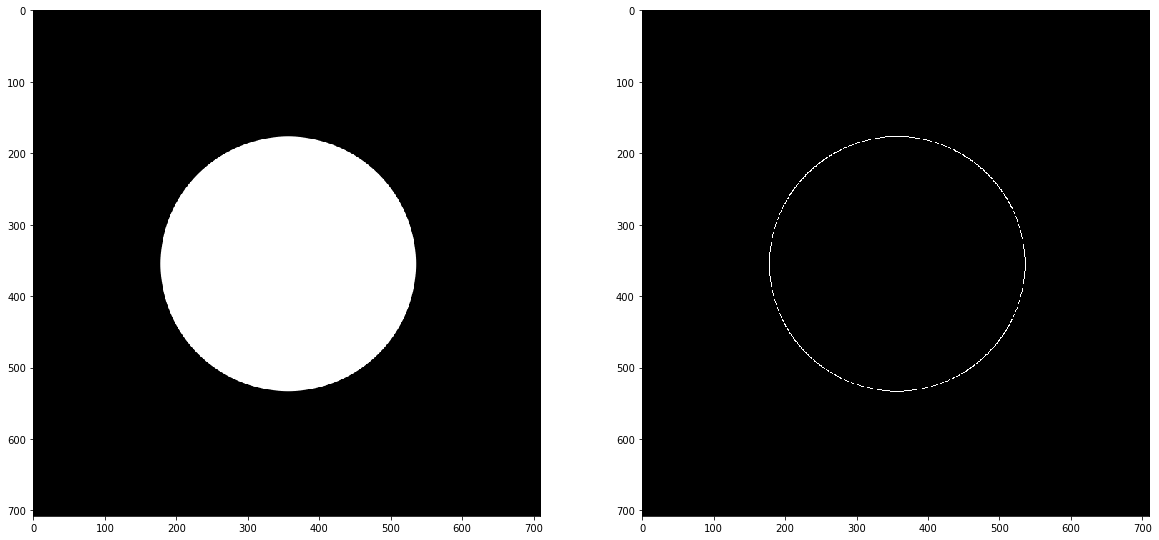

In [306]:
circle = cv2.imread('circle.png', 0)

circle_edge, circle_edge_indices = find_edge_coordinates(circle)
center_circle_x = int(circle_edge_indices['X'].median())
center_circle_y = int(circle_edge_indices['Y'].median())
print('centroid: (', center_circle_x, ',',center_circle_y,')')

radius = np.count_nonzero(circle[center_circle_x])/2
print('radius', radius)

area_analytical_circle = np.pi * radius**2

circle_edge_indices['X'] = circle_edge_indices['X'] - center_circle_x
circle_edge_indices['Y'] = circle_edge_indices['Y'] - center_circle_y
circle_edge_indices['r'] = np.sqrt(circle_edge_indices['X']**2 + circle_edge_indices['Y']**2)
circle_edge_indices['theta'] = np.arctan2(circle_edge_indices['Y'], circle_edge_indices['X'])
circle_edge_indices = circle_edge_indices.sort_values('theta',ascending=True)

display(circle_edge_indices.head())

indices_x = np.array(circle_edge_indices['X'].tolist())
indices_y = np.array(circle_edge_indices['Y'].tolist())

area = Area(indices_x, indices_y)
print("Area by using Green's Theorem: ", area)
print("Theoretical area:", area_analytical_circle)

percent_error = np.abs((area - area_analytical_circle) / area_analytical_circle) * 100
print(percent_error)

plt.figure(figsize=[20,20])
plt.subplot(121)
plt.imshow(circle, cmap = 'gray')
plt.subplot(122)
plt.imshow(circle_edge, cmap='gray')
plt.savefig('Final_circle.png', bbox_inches = 'tight')
plt.show()

centroid: ( 354 , 356 )
88133.0
88804
0.7555965947479844


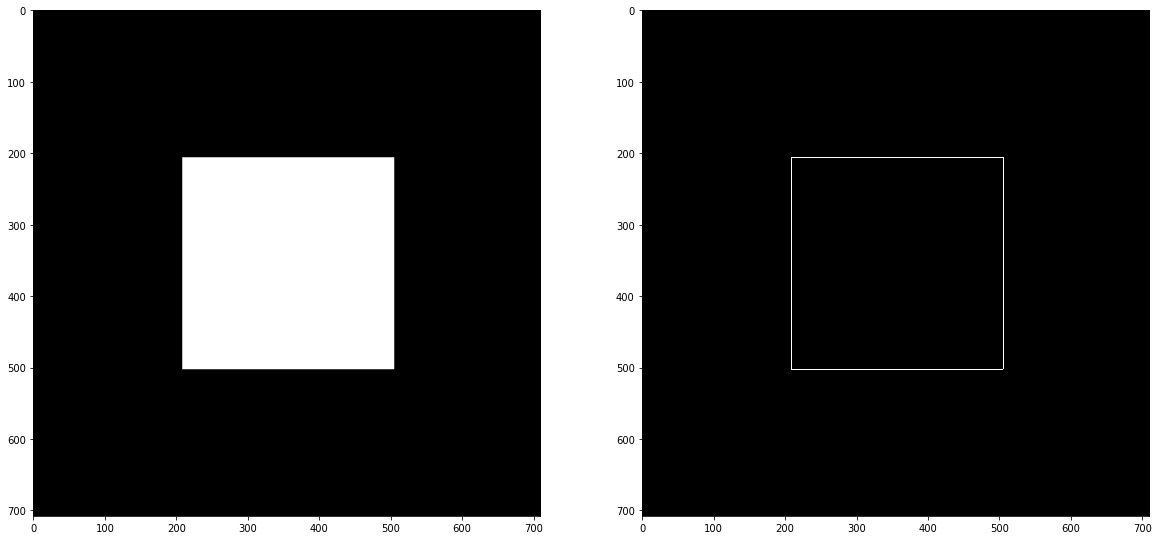

In [304]:
square = cv2.imread('square.png', 0)
square_edge, square_edge_indices = find_edge_coordinates(square)
square_circle_x = int(square_edge_indices['X'].median())
square_circle_y = int(square_edge_indices['Y'].median())

print('centroid: (', square_circle_x, ',',square_circle_y,')')

side = np.count_nonzero(square[square_circle_x])

area_analytical_square = side**2

square_edge_indices['X'] = square_edge_indices['X'] - square_circle_x
square_edge_indices['Y'] = square_edge_indices['Y'] - square_circle_y
square_edge_indices['r'] = np.sqrt(square_edge_indices['X']**2 + square_edge_indices['Y']**2)
square_edge_indices['theta'] = np.arctan2(square_edge_indices['Y'], square_edge_indices['X'])
square_edge_indices = square_edge_indices.sort_values('theta',ascending=True)

indices_x = np.array(square_edge_indices['X'].tolist())
indices_y = np.array(square_edge_indices['Y'].tolist())

area = Area(indices_x, indices_y)# + len(indices_x)
print(area)
print(area_analytical_square)

percent_error = np.abs((area - area_analytical_square) / area_analytical_square) * 100
print(percent_error)


plt.figure(figsize=[20,20])
plt.subplot(121)
plt.imshow(square, cmap = 'gray')
plt.subplot(122)
plt.imshow(square_edge, cmap='gray')
plt.savefig('Final_square.png', bbox_inches = 'tight')
plt.show()

,X,Y,r,theta,X_m,Y_m
198,-151,-1,151.003311,-3.134970,-13.8675,-3.0525
197,-151,-2,151.013244,-3.128348,-13.8675,-3.1246
196,-151,-3,151.029798,-3.121728,-13.8675,-3.1967
195,-151,-4,151.052971,-3.115109,-13.8675,-3.2688
194,-151,-5,151.082759,-3.108492,-13.8675,-3.3409


175677.0
903.7297064600025
0.9936780828218081


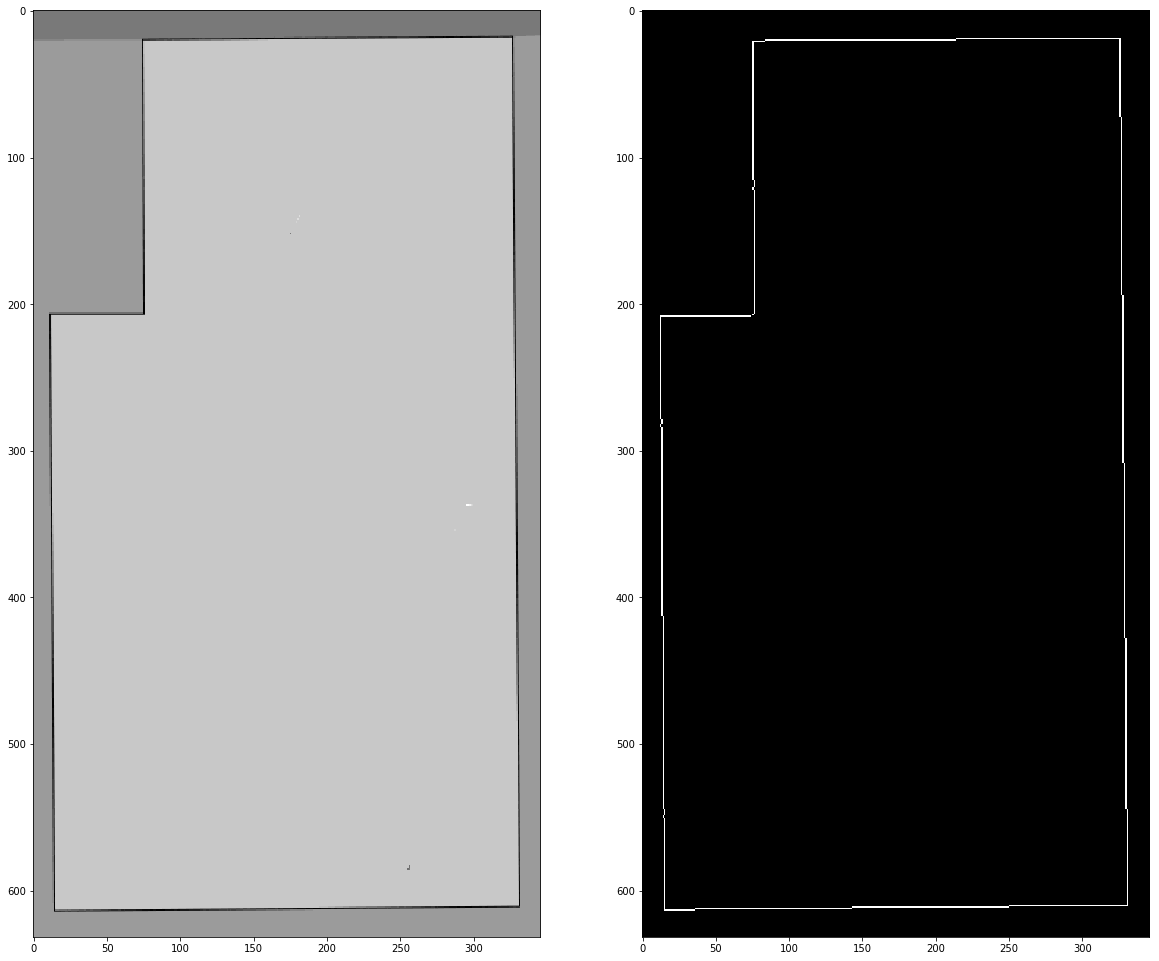

In [301]:
island = cv2.imread('cashier.png', 0)
island_edges = cv2.Canny(island, 65, 40)
island_indices = np.where(edges != [0])
island_data = pd.DataFrame()
island_data['X'], island_data['Y'] = island_indices[0], island_indices[1]

island_center_x = int(island_data['X'].median())
island_center_x = int(island_data['Y'].median())

island_data['X'] = island_data['X'] - island_center_x
island_data['Y'] = island_data['Y'] - island_center_x
island_data['r'] = np.sqrt(island_data['X']**2 + island_data['Y']**2)
island_data['theta'] = np.arctan2(island_data['Y'], island_data['X'])
island_data = island_data.sort_values('theta',ascending=True)


island_data['X_m'] = -2.9804 + 0.0721*island_data['X']
island_data['Y_m'] = -2.9804 + 0.0721*island_data['Y']

indices_x = np.array(island_data['X'].tolist())
indices_y = np.array(island_data['Y'].tolist())

indices_x_m = np.array(island_data['X_m'].tolist())
indices_y_m = np.array(island_data['Y_m'].tolist())

display(island_data.head())
area_pixels = Area(indices_x, indices_y) + len(indices_x)
area_meters = Area(indices_x_m, indices_y_m)
print(area_pixels)
print(area_meters)

area_analytical = 912.80

percent_error = np.abs((area_meters - area_analytical) / area_analytical) * 100
print(percent_error)


plt.figure(figsize=[20,20])
plt.subplot(121)
plt.imshow(island, cmap = 'gray')
plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.savefig('Final_cashier.png', bbox_inches = 'tight')
plt.show()

In [285]:
## calibration curve for converting pixel to meters

distance = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
pixel = [41,55,70,83,97,111,125,138,152,166,180,194,208,222,235,249,263,277,291,306,319]

In [286]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    #print('best fit line:\ny = {:.2f} + {:.6f}x'.format(a, b))

    return a, b

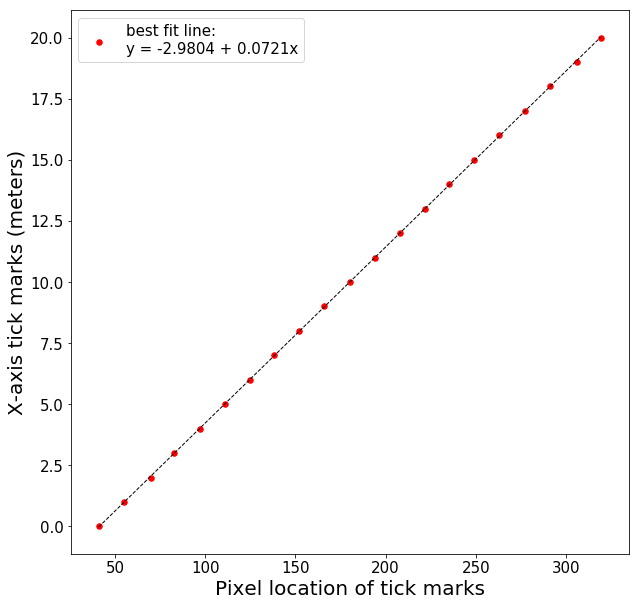

In [287]:
a, b = best_fit(pixel, distance)
yfit = [a + b * xi for xi in pixel]

plt.figure(figsize=(10,10))
plt.plot(pixel, yfit, 'k--', linewidth=1)
plt.scatter(pixel, distance, 
            label="best fit line:\ny = {:.4f} + {:.4f}x".format(a, b), s = 30, color = 'red')
plt.legend(fontsize=15)
plt.ylabel('X-axis tick marks (meters)', fontsize=20)
plt.xlabel('Pixel location of tick marks', fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig('Calibration curve.png', bbox_inches='tight')
plt.show()